In [1]:
import sklearn
from PIL import Image
import skimage.io as SKimg
import numpy as np
import random
import matplotlib.pyplot as plt
import rasterio as rio
from scipy.sparse import csr_matrix
import scipy.io as sio
import pandas as pd

import MatrixNeighborhood  as MNB

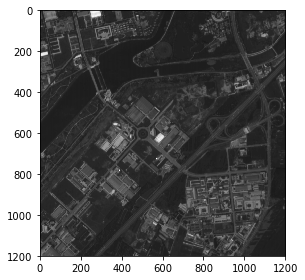

(1200, 1200)

In [2]:
Tpan =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200pan.tif")
SKimg.imshow(Tpan)
SKimg.show()
Tpan.shape

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


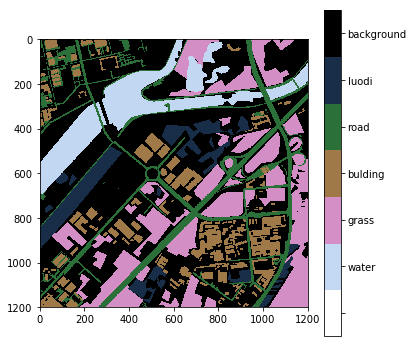

In [3]:
#matlab文件名  
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

moban=(mk*0)+1;

plt.figure(figsize=(6,6))
im = Image.fromarray(mk);
plt.imshow(im,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.show();

In [4]:
PPB=MNB.PPBeight(mk)

[[6 6 4 ..., 6 6 6]
 [6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


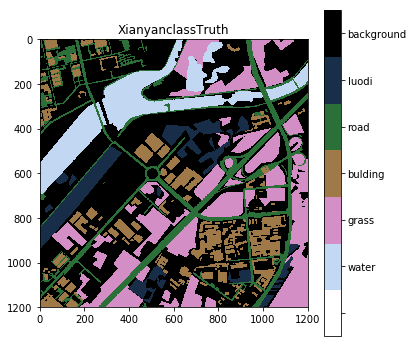

1425946
14054
0.9902402777777778


In [5]:
L1F=0.000001+np.sum((PPB==1),axis=0)/8;
L2F=0.000001+np.sum((PPB==2),axis=0)/8;
L3F=0.000001+np.sum((PPB==3),axis=0)/8;
L4F=0.000001+np.sum((PPB==4),axis=0)/8;
L5F=0.000001+np.sum((PPB==5),axis=0)/8;
L6F=0.000001+np.sum((PPB==6),axis=0)/8;

ALL=[L1F,L2F,L3F,L4F,L5F,L6F];

proLabel=np.zeros(mk.shape[0]*mk.shape[1]);
for p in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;
    tempF=[ALL[0][p],ALL[1][p],ALL[2][p],ALL[3][p],ALL[4][p],ALL[5][p]];
    for MI in range(0,len(tempF)):
        if(tempF[MI]>MAXP):
            MAXP=tempF[MI];
            maxindex=MI+1;
    proLabel[p]=maxindex;

import math
PROfinal=mk-2;
for HL in range(0,len(proLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    PROfinal[h][l]=proLabel[HL];

# 成图展示
mylabelPRO=PROfinal;
print(mylabelPRO)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabelPRO);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.title('XianyanclassTruth');
plt.show();

TrueOrFalse=(mylabelPRO==mk)
TrueValue=TrueOrFalse[TrueOrFalse>0]
FalseValue=TrueOrFalse[TrueOrFalse==0]
correct=len(TrueValue)/(len(TrueValue)+len(FalseValue));
print(len(TrueValue));  print(len(FalseValue));  print(correct);


In [6]:
NewTpan=Tpan.reshape(1,Tpan.shape[0]*Tpan.shape[1]);
NewMK=mk.reshape(1,mk.shape[0]*mk.shape[1]);

ALLUvalue=np.unique(NewTpan,return_index=True,return_inverse=True,return_counts = True)[0];
ALLUinverse=np.unique(NewTpan,return_index=True,return_inverse=True,return_counts = True)[2];
LenthofALLunique=len(ALLUvalue);


ALLfinalF=[];
for i in range(1,7):
    TF=(NewMK==i);
    TempMask=TF*NewTpan;
    usefulValue=TempMask[TF];

    Uvalue=np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[0];
    Uinverse=np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[2];
    Ufrence=(np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[3])/len(usefulValue);

    fram1=pd.DataFrame({'id':ALLUvalue});
    fram2=pd.DataFrame({'id':Uvalue,'F':Ufrence});
   
    MEge=pd.merge(fram1,fram2,on='id',how='outer');
    MegeFILL=MEge.fillna({'F':0.0});
    finalF=MegeFILL['F'];
    
    newfinalF=np.array(finalF[ALLUinverse]);
    ALLfinalF.append(newfinalF);
    

In [7]:
ALLpost=[];
for i in range(0,len(ALLfinalF)):
    TEMPpost=10000*(ALLfinalF[i]+0)*ALL[i];
    ALLpost.append(TEMPpost);



In [8]:
LastLabel=np.zeros(mk.shape[0]*mk.shape[1]);

for j in range(0,mk.shape[0]*mk.shape[1]):
    MAXP=0;   maxindex=0;
    tempF=[ALLpost[0][j],ALLpost[1][j],ALLpost[2][j],ALLpost[3][j],ALLpost[4][j],ALLpost[5][j]];
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k];
            maxindex=k+1;
    LastLabel[j]=maxindex;

finaLabel=mk-2;
for HL in range(0,len(LastLabel)):
    h=math.floor(HL/1200); l=HL%1200;
    finaLabel[h][l]=LastLabel[HL];

[[6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [3 3 3 ..., 2 2 2]
 [3 3 3 ..., 2 2 2]]


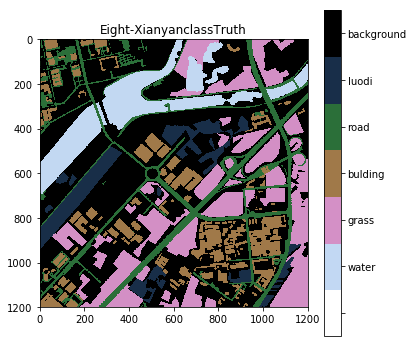

In [9]:
# 成图展示
mylabel=finaLabel;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.title('Eight-XianyanclassTruth');
plt.show();

In [10]:
TrueOrFalse=(mylabel==mk)
TrueValue=TrueOrFalse[TrueOrFalse>0]
FalseValue=TrueOrFalse[TrueOrFalse==0]
correct=len(TrueValue)/(len(TrueValue)+len(FalseValue));
print(len(TrueValue));  print(len(FalseValue));  print(correct);


1395441
44559
0.96905625


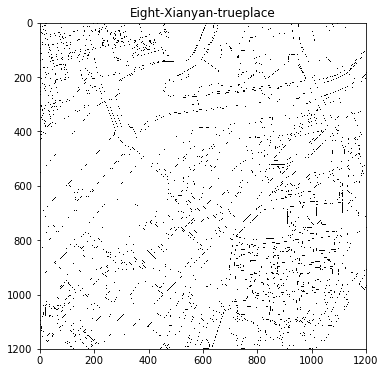

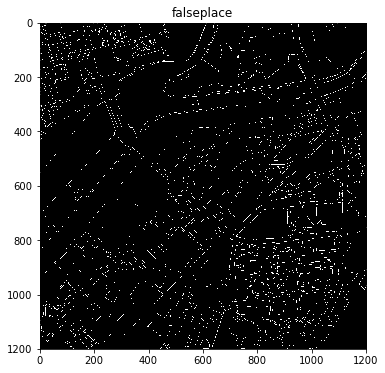

In [11]:
TRUEplace=(mylabel==mk)*10000;
FalsePlace=(mylabel!=mk)*10000;

plt.figure(figsize=(6,6))
imT = Image.fromarray(TRUEplace);
plt.imshow(imT,cmap='Oranges');
plt.title('Eight-Xianyan-trueplace');
plt.show();

plt.figure(figsize=(6,6))
imF = Image.fromarray(FalsePlace);
plt.imshow(imF,cmap='Reds');
plt.title('falseplace');
plt.show();